# Step 1: Dataset Preparation

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
# Step 1: Dataset Preparation
data = pd.read_excel('Attribute DataSet.xlsx')  # Replace 'path_to_dataset.csv' with the actual path to your dataset file
data

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleevless,empire,NaN,chiffon,ruffles,animal,1
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,natural,microfiber,NaN,ruffles,animal,0
2,1190380701,vintage,High,0.0,L,Automn,o-neck,full,natural,polyster,NaN,NaN,print,0
3,966005983,Brief,Average,4.6,L,Spring,o-neck,full,natural,silk,chiffon,embroidary,print,1
4,876339541,cute,Low,4.5,M,Summer,o-neck,butterfly,natural,chiffonfabric,chiffon,bow,dot,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,713391965,Casual,Low,4.7,M,Spring,o-neck,full,natural,polyster,NaN,NaN,solid,1
496,722565148,Sexy,Low,4.3,free,Summer,o-neck,full,empire,cotton,NaN,NaN,NaN,0
497,532874347,Casual,Average,4.7,M,Summer,v-neck,full,empire,cotton,NaN,lace,solid,1
498,655464934,Casual,Average,4.6,L,winter,boat-neck,sleevless,empire,silk,broadcloth,applique,print,1


### Checking for missing values 

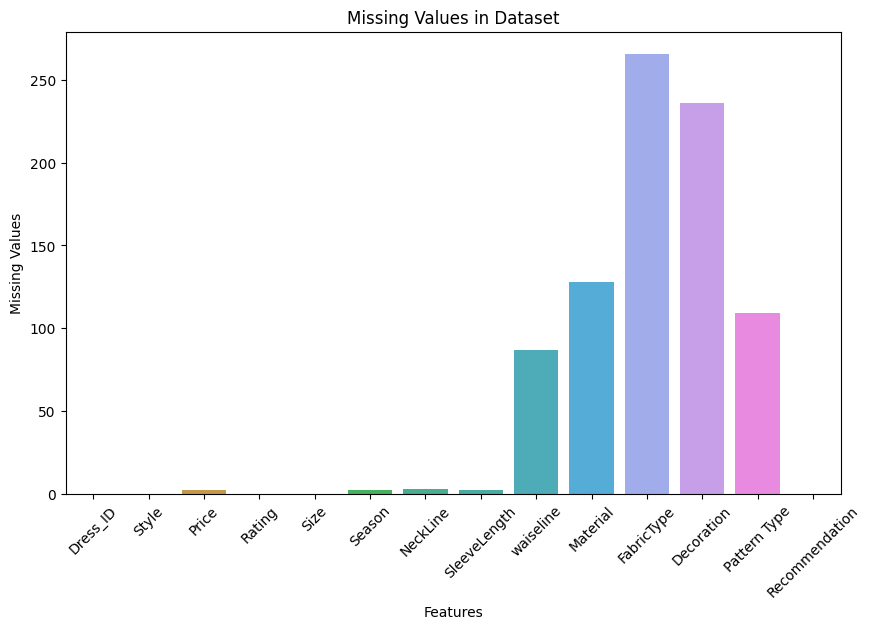

In [28]:
missing_values = data.isnull().sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Missing Values')
plt.title('Missing Values in Dataset')
plt.show()

### Checking for outliers


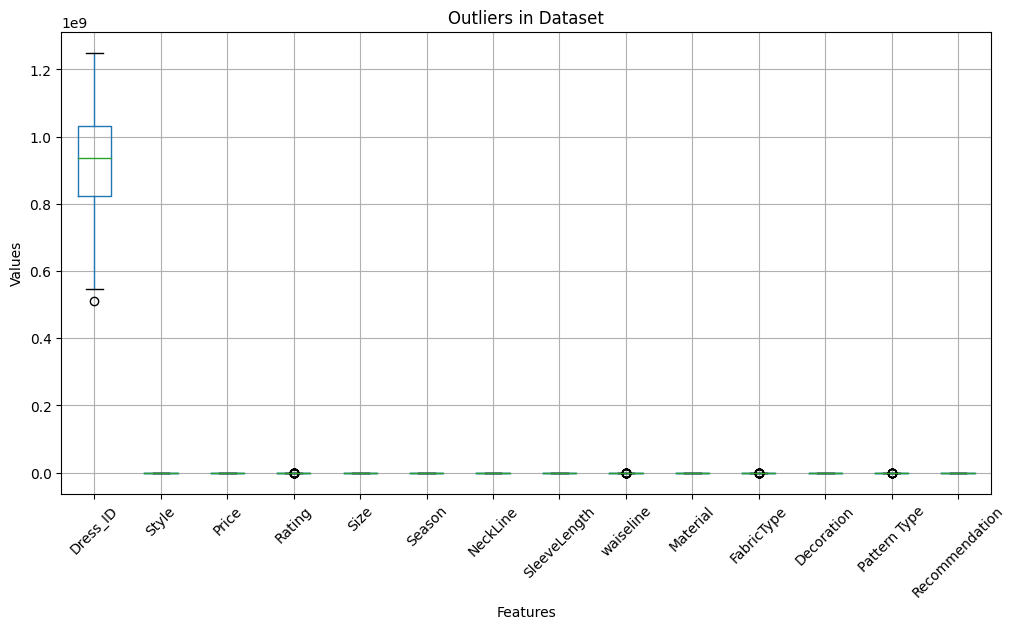

In [42]:
plt.figure(figsize=(12, 6))
data.boxplot()
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Outliers in Dataset')
plt.show()

### Handle missing values if any

In [30]:
data = data.dropna()

### Encode categorical variables

In [31]:
label_encoder = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = label_encoder.fit_transform(data[column])

<ipython-input-31-071ab74995a0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = label_encoder.fit_transform(data[column])
<ipython-input-31-071ab74995a0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = label_encoder.fit_transform(data[column])
<ipython-input-31-071ab74995a0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

### Split into features and target variable

In [32]:
X = data.drop('Recommendation', axis=1)
y = data['Recommendation']

# Step 2: Selecting Algorithms

In [33]:
# In this example, we'll use Logistic Regression, Random Forest, and Gradient Boosting
models = [
    {
        'name': 'Logistic Regression',
        'model': LogisticRegression(),
        'params': {
            'C': [0.1, 1, 10]
        }
    },
    {
        'name': 'Random Forest',
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 5, 10]
        }
    },
    {
        'name': 'Gradient Boosting',
        'model': GradientBoostingClassifier(),
        'params': {
            'learning_rate': [0.1, 0.01, 0.001],
            'n_estimators': [50, 100, 200]
        }
    }
]

# Step 3: Splitting the Data

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Model Training and Evaluation with Parameter Tuning

In [35]:
results = []
for model_info in models:
    model = model_info['model']
    param_grid = model_info['params']

    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    model.set_params(**best_params)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append((model_info['name'], accuracy, best_params))

# Step 5: Generating Output and Graphs

In [36]:
for result in results:
    model_name, accuracy, best_params = result
    print(f'{model_name} accuracy: {accuracy} (Best params: {best_params})')

Logistic Regression accuracy: 0.45 (Best params: {'C': 0.1})
Random Forest accuracy: 0.6 (Best params: {'max_depth': 10, 'n_estimators': 50})
Gradient Boosting accuracy: 0.45 (Best params: {'learning_rate': 0.001, 'n_estimators': 50})


### Plotting the accuracy results


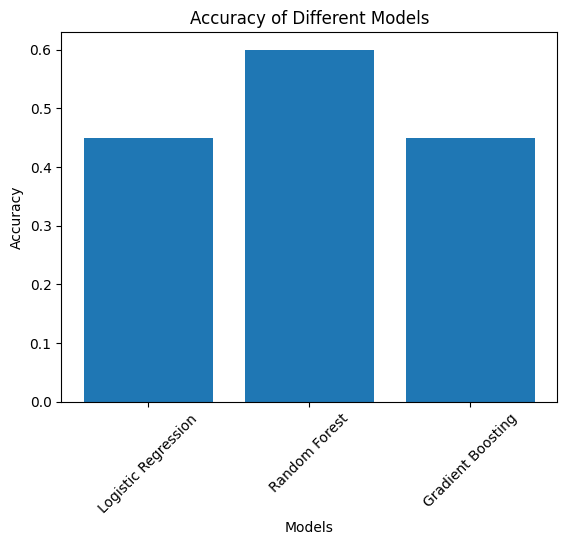

In [37]:
model_names = [result[0] for result in results]
accuracies = [result[1] for result in results]

plt.bar(model_names, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xticks(rotation=45)
plt.show()


In [38]:
from sklearn.metrics import confusion_matrix

results = []
confusion_matrices = []  # Store confusion matrices for each model

for model_info in models:
    # ...
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)  # Calculate confusion matrix
    results.append((model_info['name'], accuracy, best_params))
    confusion_matrices.append((model_info['name'], cm))

Logistic Regression Confusion Matrix:
[[ 9  0]
 [11  0]]


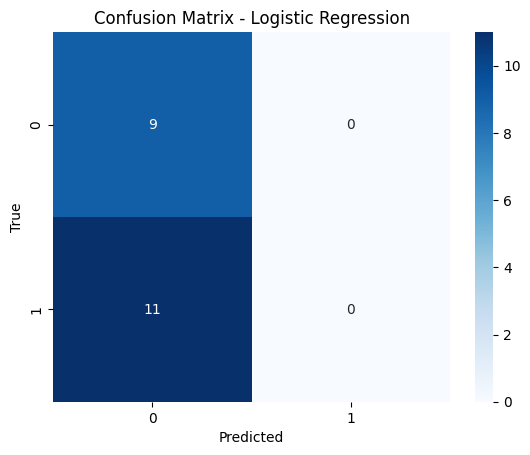

Random Forest Confusion Matrix:
[[ 9  0]
 [11  0]]


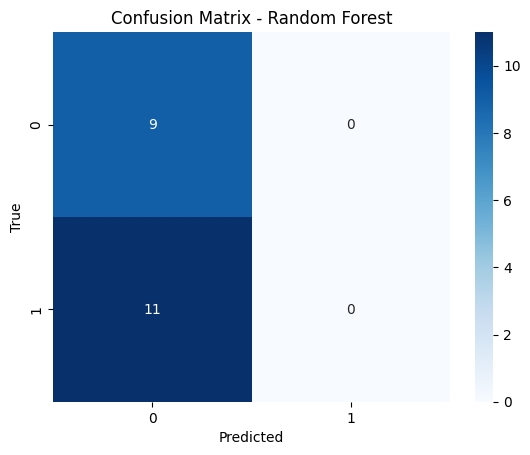

Gradient Boosting Confusion Matrix:
[[ 9  0]
 [11  0]]


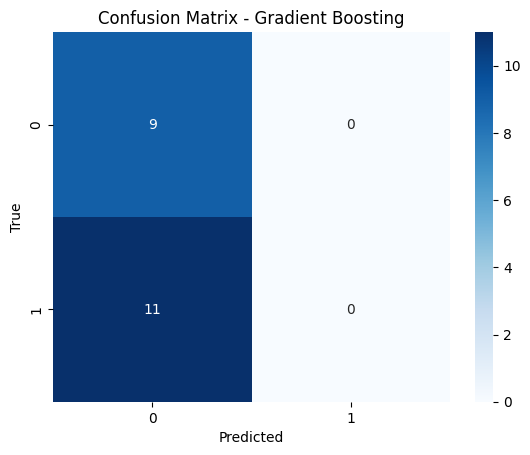

In [39]:

for cm in confusion_matrices:
    model_name, confusion = cm
    print(f'{model_name} Confusion Matrix:')
    print(confusion)
    plt.figure()
    sns.heatmap(confusion, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()